<a href="https://colab.research.google.com/github/meryreddoor/yogagame_/blob/primeraRama/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display 
from PIL import Image
import h5py
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import glob
import json

In [0]:
data = pd.read_pickle("/content/todos.pkl")

In [49]:
data.shape

(1034, 11)

In [50]:
data.head(3)

,pose,png,path,array,ardha matsyendrasana,bakasana,bitilasana,chaturanga dandasana,garudasana,vriksasana,gt
0,chaturanga dandasana,33-0.png,../img/chaturanga dandasana/33-0.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
1,chaturanga dandasana,76-0.png,../img/chaturanga dandasana/76-0.png,"[[244, 244, 244, 244, 244, 243, 244, 244, 244,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
2,chaturanga dandasana,50-2.png,../img/chaturanga dandasana/50-2.png,"[[254, 255, 255, 175, 122, 145, 143, 146, 144,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"


In [51]:
data['array']

0       [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1       [[244, 244, 244, 244, 244, 243, 244, 244, 244,...
2       [[254, 255, 255, 175, 122, 145, 143, 146, 144,...
3       [[246, 241, 247, 246, 247, 226, 219, 226, 224,...
4       [[196, 190, 198, 196, 198, 197, 198, 200, 196,...
                              ...                        
1029    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1030    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1031    [[203, 203, 204, 204, 205, 205, 205, 205, 205,...
1032    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1033    [[254, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: array, Length: 1034, dtype: object

In [52]:
data.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'vriksasana', 'gt'],
      dtype='object')

In [0]:
X = np.stack(data['array'])
X = X / 255.0
y = np.stack(data['gt'])

In [54]:
y.shape

(1034, 6)

In [55]:
X.shape

(1034, 224, 224)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:

img_rows, img_cols = 224, 224

In [0]:
# para poner el canala que falta
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [59]:
X.shape

(1034, 224, 224)

In [60]:
'''#DATA AUGMENTATION

datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = datagen.flow(X_train,y_train)

validation_generator = datagen.flow(X_test,y_test)'''

'#DATA AUGMENTATION\n\ndatagen = ImageDataGenerator(rescale=1./255,\n                                   shear_range=0.2,\n                                   zoom_range=0.2,\n                                   horizontal_flip=True)\n\ntrain_generator = datagen.flow(X_train,y_train)\n\nvalidation_generator = datagen.flow(X_test,y_test)'

In [61]:
n_classes = 6
batch_size = 32

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train,y_train,
               batch_size = batch_size,
               epochs = 30,
               verbose = 1,
               validation_data = (X_test,y_test))

Train on 827 samples, validate on 207 samples
Epoch 1/30
827/827 [==============================] - 70s 84ms/step - loss: 1.8451 - acc: 0.1415 - val_loss: 1.7921 - val_acc: 0.1787
Epoch 2/30
827/827 [==============================] - 69s 83ms/step - loss: 1.7811 - acc: 0.2019 - val_loss: 1.7928 - val_acc: 0.2077
Epoch 3/30
827/827 [==============================] - 69s 83ms/step - loss: 1.7512 - acc: 0.2515 - val_loss: 1.7399 - val_acc: 0.2367
Epoch 4/30
827/827 [==============================] - 69s 84ms/step - loss: 1.6227 - acc: 0.3156 - val_loss: 1.6453 - val_acc: 0.3527
Epoch 5/30
827/827 [==============================] - 69s 84ms/step - loss: 1.5747 - acc: 0.3567 - val_loss: 1.5072 - val_acc: 0.4155
Epoch 6/30
827/827 [==============================] - 69s 84ms/step - loss: 1.4487 - acc: 0.3894 - val_loss: 1.5204 - val_acc: 0.4444
Epoch 7/30
827/827 [==============================] - 69s 84ms/step - loss: 1.4491 - acc: 0.3881 - val_loss: 1.5546 - val_acc: 0.5459
Epoch 8/30
827/8

In [62]:
'''STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)'''

'STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size\nSTEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size\n\nmodel.fit_generator(train_generator,\n                    steps_per_epoch=STEP_SIZE_TRAIN,\n                    epochs=20,\n                    validation_data=validation_generator,\n                    validation_steps=STEP_SIZE_VALID)'

In [63]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Accuracy: 85.02%
Test loss: 0.4952431187249612
Test accuracy: 0.8502415467575553


In [64]:
#Columnas del df
data.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'vriksasana', 'gt'],
      dtype='object')

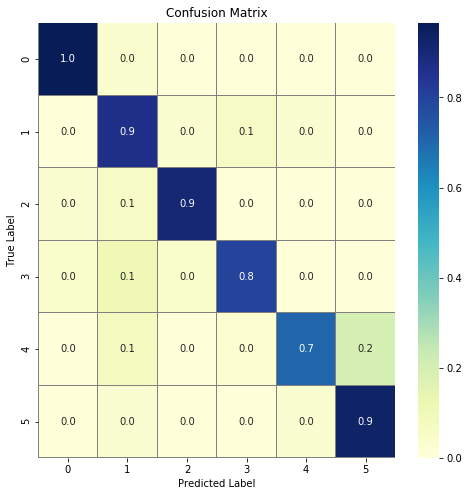

In [65]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
'''print(Y_pred_classes)
'''
Y_true = np.argmax(y_test,axis = 1)
'''print(Y_true)'''
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

[1.4553468e-02 9.6612197e-01 9.6929474e-03 6.2307185e-03 3.0829690e-03
 3.1783344e-04]
(1, 224, 224, 1)
Probs -> ardha matsyendrasana:0.01455 bakasana:0.96612 bitilasana:0.00969 chaturanga dandasana:0.00623 garudasana:0.00308 vriksasana:0.00032


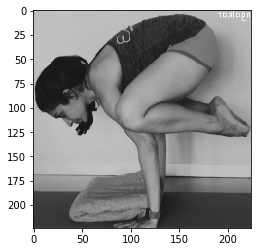

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[2]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)

print(np.expand_dims(img,axis=0).shape)
plt.imshow(Image.fromarray(img.squeeze()*255))
print("Probs -> ardha matsyendrasana:{0:.5f} bakasana:{1:.5f} bitilasana:{2:.5f} chaturanga dandasana:{3:.5f} garudasana:{4:.5f} vriksasana:{5:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5]))

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cortarImagen(path):
  # load image
  img = cv2.imread(path) 
  rsz_img = cv2.resize(img, None, fx=1, fy=1) # resize since image is huge
  gray = cv2.cvtColor(rsz_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

  # threshold to get just the signature
  retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

  # find where the signature is and make a cropped region
  points = np.argwhere(thresh_gray==0) # find where the black pixels are
  points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
  x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
  x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
  crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

  # get the thresholded crop
  retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

  # display
  cv2.imwrite(path,thresh_crop)
  cv2.waitKey(0)
  return cv2_imshow(thresh_crop)

In [0]:
def makeImagDf(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('pose', []).append(paths.split('/')[-2])
        dictionary.setdefault('png', []).append(paths.split('/')[-1])
        dictionary.setdefault('path', []).append(paths)
        dictionary.setdefault('array', []).append(cv2.resize(cv2.imread(paths, cv2.IMREAD_GRAYSCALE),(224,224)))
    images = pd.DataFrame(dictionary)
    return images

In [0]:
data_ima = makeImagDf('/content/ejemplo acostado.jpg')

In [70]:
data_ima.head()

""


In [71]:

outsider_img = np.stack(data_ima['array'])
outsider_img = outsider_img / 255

KeyError: ignored

In [0]:
PIC = outsider_img # transform pic

plt.subplot(121)
plt.imshow(cv2.imread('/content/ejemplo acostado.jpg', cv2.IMREAD_GRAYSCALE)) # original pic
plt.subplot(122)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic

PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 224, 224, 1)
print(PIC.shape)
pred = model.predict(PIC)[0]
print("Probs -> ardha matsyendrasana:{0:.5f} bakasana:{1:.5f} bitilasana:{2:.5f} chaturanga dandasana:{3:.5f} garudasana:{4:.5f} vriksasana:{5:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5]))

In [0]:
model.save('my_model_multiclass10.h5') #save model 

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("my_model_multiclass10.h5")

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
columns = 5
for i in range(columns):
    plt.figure()
    im = X[i]
    plt.imshow(im,cmap="gray")